# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
%matplotlib inline 


# Load data

In [2]:
(X, y) = load_wine(return_X_y=True, as_frame=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [3]:
pd.DataFrame(X_train).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


# PCA + SVM

Task 1: Use X_train, y_train to train a SVM (SKlean's SVC) with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Make sure you normailize the data by using StandardScaler
Evaulate the algorithm using accuracy score and X_test, y_test.

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.9861111111111112

Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.
    
> PCA is just rotating the dataset so that the new coordinate system (or the principal components) would be ordered by the variance they capture. 
>
> Using all PCs means we're just using the exact same data with a different coordinate system. Since we're giving our model the same data to work with, it makes sense we won't get different results (barring some regularization etc.)

Print the accuracy of SVM + PCA.

In [5]:
pca_pipe = make_pipeline(StandardScaler(), PCA(), SVC()).fit(X_train, y_train)
y_pred_pca= pca_pipe.predict(X_test)
accuracy_score(y_test, y_pred_pca)

0.9861111111111112

Q2: Did the results improve\stayed the same\got worse? 
    
> Got the same results.

# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

In [6]:
pipe = make_pipeline(StandardScaler(), LogisticRegression()).fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.9861111111111112

Task 4: repeast task 2 with logistic regression.

In [7]:

pca_pipe = make_pipeline(StandardScaler(), PCA(), LogisticRegression()).fit(X_train, y_train)
y_pred_pca = pca_pipe.predict(X_test)
accuracy_score(y_test, y_pred_pca)

0.9861111111111112

Q3: Did the results improved\stayed the same\got worse?

> Same


Same but using a decision tree:

In [38]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0)).fit(X_train, y_train)
y_pred= pipe.predict(X_test)
print(f'Accuracy without PCA: {accuracy_score(y_test, y_pred):.2f}')

pca_pipe = make_pipeline(StandardScaler(), PCA(), DecisionTreeClassifier(random_state=0)).fit(X_train, y_train)
y_pred_pca= pca_pipe.predict(X_test)
print(f'Accuracy with PCA: {accuracy_score(y_test, y_pred_pca):.2f}')

Accuracy without PCA: 0.85
Accuracy with PCA: 0.88


Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of the decision tree and the main difference of SVM from it. Hint: SVM assumes the data can be seperated by an hyperplan.
> Decision trees creates a non-linear decision plane while logistic regression and SVM assume linearity.
>
> This means that for linearly seperable data, SVM and LR would be able to find a good decision boundary with relative ease. A decision tree would have a harder time, since a rectilinear decision boundary might not be the best fit for the data, raising the risk of overfitting.
>
> PCA's rotation of the data might allows the decision tree to define a decision boundary that's simple and linear instead of step-like, as long as the data's true classes are indeed divided along the newly created PCs.

# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

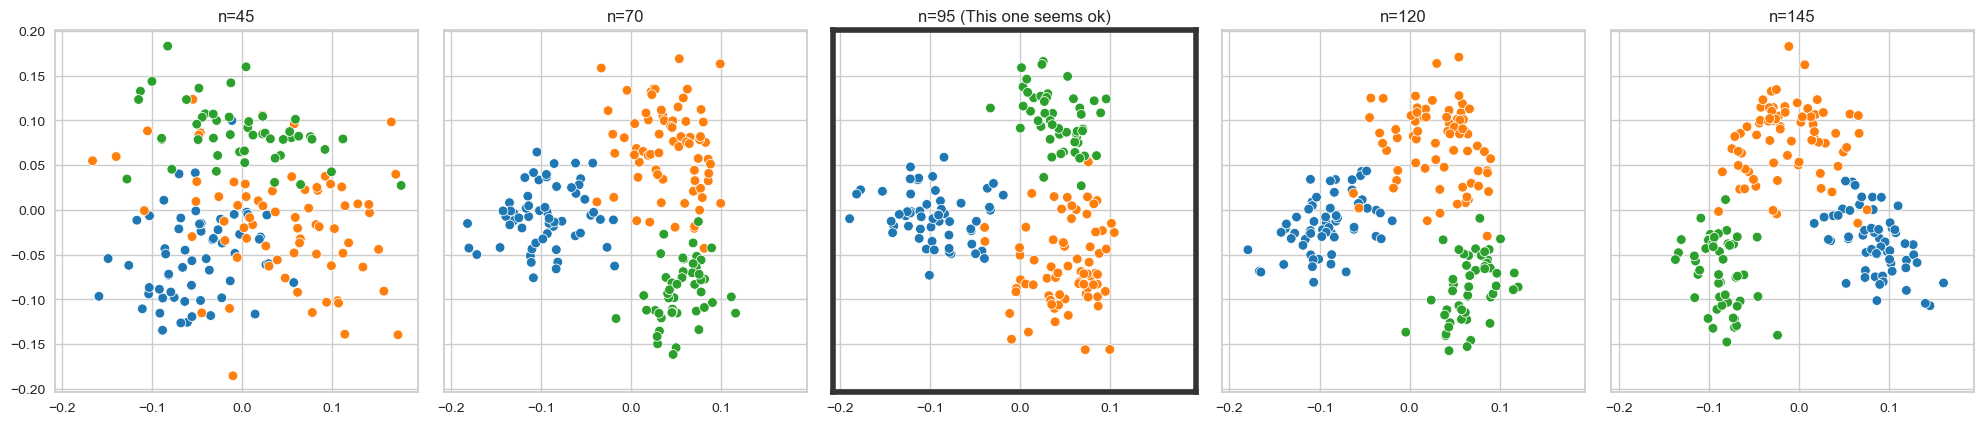

In [30]:
from sklearn.manifold import locally_linear_embedding
import matplotlib.pyplot as plt
import seaborn as sns

ns = range(45, 146, 25)

fig, axs = plt.subplots(1, 5, sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(4)


X_scaled = StandardScaler().fit_transform(X)

for ax, n in zip(axs.flatten(), ns):
    if n==95:
        for side in ['bottom', 'top', 'right', 'left']:
            ax.spines[side].set_color('0.2')
            ax.spines[side].set_linewidth(4)
            ax.set_title(f'n={n} (This one seems ok)')
    else:
        ax.set_title(f'n={n}')
    ax.set_box_aspect(1)
    X_emb = locally_linear_embedding(X_scaled, n_neighbors=n, n_components=2, random_state=2)[0]
    sns.scatterplot(x=X_emb[:,0], y=X_emb[:,1], hue=y, ax=ax, legend=0, palette='tab10')

fig.tight_layout()


Task 6: Use t-SNE to visualize the data. Plot the results.

c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


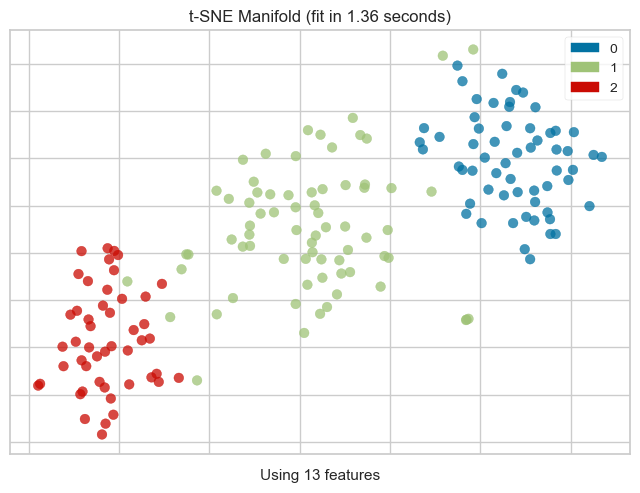

In [26]:
from yellowbrick.features.manifold import manifold_embedding
manifold_embedding(X_scaled, y, normalized_stress='auto', manifold='tsne');

Task 7: Use UMAP to visualize the data. Plot the results.

<AxesSubplot:>

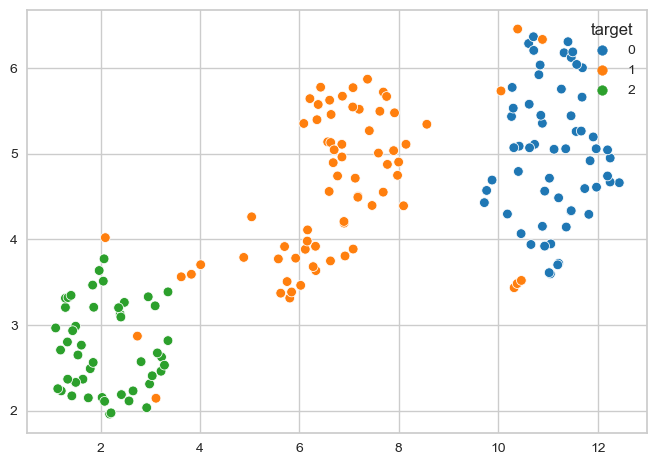

In [23]:
import umap
X_emb = umap.UMAP().fit_transform(X_scaled)
sns.scatterplot(x=X_emb[:,0], y=X_emb[:,1], hue=y, palette='tab10')

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?
    
> LLE's default parameters would make us use `arpack` as an eigensolver, which is non-deterministic.
>
> t-SNE deterministic if it's initialization is non-random, which is the case starting sklearn 1.2. 
>
> UMAP uses stochastic gradient descent to optimize, so it's also random. 
